# 데이터 분석의 목적
- 코로나 확진자와 배달음식 주문 데이터를 분석하여 두 데이터 간에 상관관계가 있는지 알아본다.

## 데이터 출처
- 시간-지역별 배달 주문건수  [(출처)](https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUTIMEORDER)<br>
- 전국 코로나 확진자  [(출처)](https://kdx.kr/data/view/25918)

## 1. 필요한 라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [3]:
# 차트 한글 깨짐 방지

import platform
# 운영체제별 한글폰트 설정
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)

# 경고메세지 무시
import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 읽기 & 전처리

In [46]:
def data_processing_corona(df):
    df = df.loc[:, '일자':'누적 확진자']
    df['일자'] = pd.to_datetime(df['일자'],format='%Y%m%d')
    df.insert(1, 'year', df['일자'].dt.year)
    df.insert(2, 'month', df['일자'].dt.month)
    df.drop_duplicates(['누적 확진자'], keep = 'last', ignore_index = True, inplace=True)
    df['일일 확진자'] = df['누적 확진자'].diff().fillna(df['누적 확진자']).astype('int')
    return df

def data_processing_delivery(filename):
    df = pd.read_csv(filename
                    , names=['date', 'time', 'sido', 'sigungu', 'dong', 'cnt']
                    , parse_dates=[0])
    df.insert(1, 'year', df['date'].dt.year)
    df.insert(2, 'month', df['date'].dt.month)
    df = df.reset_index(drop=True)
    return df

In [50]:
# 전국 코로나 2020년 확진자 데이터
corona_total = data_processing_corona('corona/corona19.csv')
corona_total = corona_total[corona_total['year']==2020]
corona_total.head()

,일자,year,month,누적 확진자,일일 확진자
0,2020-01-20,2020,1,1,1
1,2020-01-24,2020,1,2,1
2,2020-01-26,2020,1,3,1
3,2020-01-27,2020,1,4,1
4,2020-01-30,2020,1,7,3


In [51]:
# 전국 2020년 배달 주문 데이터
df_2020_1 = data_processing_delivery('delivery/elicer_2020_1.csv')
df_2020_2 = data_processing_delivery('delivery/elicer_2020_2.csv')
df_2020 = pd.concat([df_2020_1, df_2020_2])
df_2020.head()

,date,year,month,time,sido,sigungu,dong,cnt
0,2020-01-01,2020,1,0,경기도,고양시 덕양구,토당동,2
1,2020-01-01,2020,1,0,경기도,고양시 덕양구,행신동,16
2,2020-01-01,2020,1,0,경기도,고양시 덕양구,화정동,28
3,2020-01-01,2020,1,0,경기도,고양시 일산동구,마두동,6
4,2020-01-01,2020,1,0,경기도,고양시 일산동구,백석동,18


## 3. 2020년 코로나 확진자와 배달 건수 그래프

In [52]:
# 각 데이터프레임을 month로 groupby 후 각각 일일 확진자수와 cnt의 합으로 새로운 index생성
confirmed_cnt = corona_total.groupby(['month'])['일일 확진자'].sum().reset_index(name='확진자수')
confirmed_cnt_delivery = df_2020.groupby(['month'])['cnt'].sum().reset_index(name='delivery_cnt')
display(confirmed_cnt)
display(confirmed_cnt_delivery)

,month,확진자수
0,1,7
1,2,3143
2,3,6636
3,4,979
4,5,703
5,6,1332
6,7,1505
7,8,5642
8,9,3865
9,10,2699


,month,delivery_cnt
0,1,878334
1,2,941286
2,3,1018552
3,4,1014196
4,5,1084416
5,6,1091229
6,7,1147225
7,8,1370364
8,9,1113303
9,10,1124853


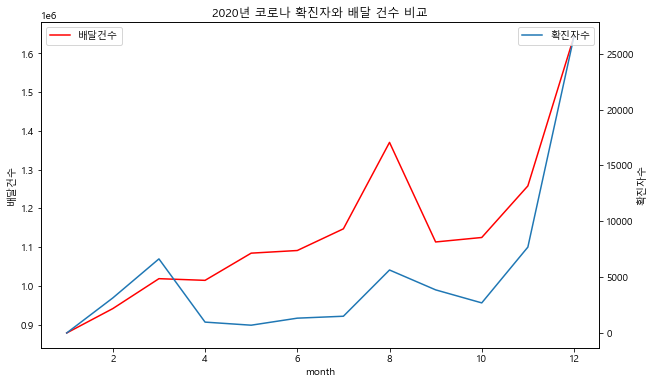

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('2020년 코로나 확진자와 배달 건수 비교')
ax = sns.lineplot(x='month', y='delivery_cnt', data=confirmed_cnt_delivery, color='red', label='배달건수')
ax.set_ylabel('배달건수')

ax1 = ax.twinx()
ax1 = sns.lineplot(x='month', y='확진자수', data=confirmed_cnt, label='확진자수')
ax1.set_ylabel('확진자수')
ax1.legend(loc='upper right')

plt.show()